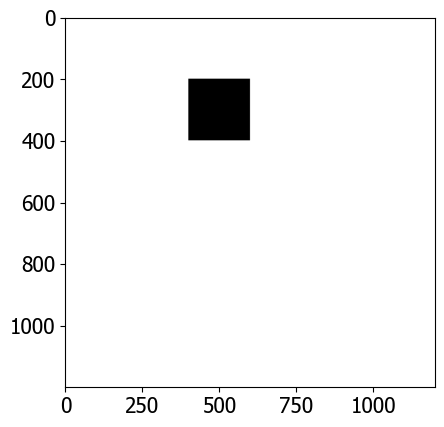

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def create_map(width, height, obstacles=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    # Add black obstacles
    for obstacle in obstacles:
        x, y, obstacle_width, obstacle_height = obstacle
        map_array[y:y + obstacle_height, x:x + obstacle_width] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200 , 200)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles)
#save_map_to_npy(map_array, 'Downloads/map_with_obstacles.npy')

# Visualize the map
visualize_map(map_array)


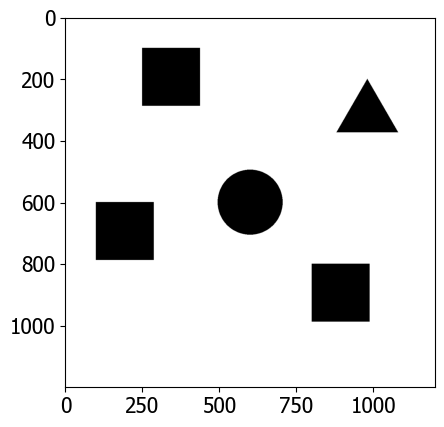

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, polygon, disk

def create_map(width, height, shapes=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    for shape in shapes:
        shape_type, params = shape[0], shape[1:]
        
        if shape_type == 'rectangle':
            rr, cc = rectangle(start=params[:2], end=(params[0] + params[2], params[1] + params[3]), extent=None, shape=map_array.shape)
            map_array[rr, cc] = 0
        elif shape_type == 'triangle':
            rr, cc = polygon([params[0], params[0] + params[2], params[0] + params[2]], 
                             [params[1], params[1] + params[3]//2 , params[1] - params[3]//2], shape=map_array.shape)
            map_array[rr, cc] = 0
        if shape_type == 'disk':
            cy, cx, radius = params
            rr, cc = disk((cy, cx), radius, shape=map_array.shape)
            map_array[rr , cc] = 0
#         elif shape_type == 'circle':
#             rr, cc = circle(params[1], params[0], params[2], shape=map_array.shape)
#             map_array[rr, cc] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200, 200)]

# Additional shapes (triangle, square, circle, square, circle)
shapes = [('triangle', 200, 980, 173, 200), # h = 200 , b = 231
          ('rectangle', 800, 800, 187, 187),
          ('rectangle', 100, 250, 187, 187),
          ('rectangle', 600, 100, 187, 187),
          ('disk', 600, 600, 105.5)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles + shapes)
#save_map_to_npy(map_array, 'Downloads/map_with_shapes.npy')

# Visualize the map
visualize_map(map_array)


In [ ]:
#For rectangle we need starting row coordinate and starting column coordinate and we also need its height and width
#width increases to the right and the height increases downwards

#For triangle we need the top two coordinates, the height and base length

#for disk just the center and radius